In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.cm as cm

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib.colors import ListedColormap

In [2]:
plt.style.use('dark_background')

In [3]:
data = pd.read_csv('./KaDo.csv')

In [4]:
base_df = data.copy()

# Clustering Client

In [5]:
df = base_df.filter(["PRIX_NET", "NB_ACHAT", "MAILLE", "CLI_ID"])
df["NB_ACHAT"] = 1

df.head()

,PRIX_NET,MAILLE,CLI_ID,NB_ACHAT
0,1.67,HYG_JDM,1490281,1
1,1.66,HYG_JDM,1490281,1
2,7.45,VIS_JEUNE_ET_LEVRE,1490281,1
3,5.95,VIS_AAAR_DEMAQLOTION,1490281,1
4,1.67,HYG_JDM,1490281,1


In [6]:
cart_df = df.groupby(["CLI_ID"], as_index=True).sum()\
.reset_index()\
.filter(['PRIX_NET', 'NB_ACHAT'])
cart_df.head()

,PRIX_NET,NB_ACHAT
0,18.40,5
1,55.50,9
2,7.45,1
3,6.70,2
4,7.05,3


In [7]:
X = cart_df

In [8]:
X

,PRIX_NET,NB_ACHAT
0,18.40,5
1,55.50,9
2,7.45,1
3,6.70,2
4,7.05,3
...,...,...
853509,19.80,4
853510,28.80,5
853511,72.65,10
853512,73.70,19


In [9]:
nb_cluster = 99
kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit(X.values)
cart_df["label"] = kmeans.labels_

In [10]:
cart_df.head()

,PRIX_NET,NB_ACHAT,label
0,18.40,5,79
1,55.50,9,32
2,7.45,1,11
3,6.70,2,11
4,7.05,3,11


(0.0, 150.0)

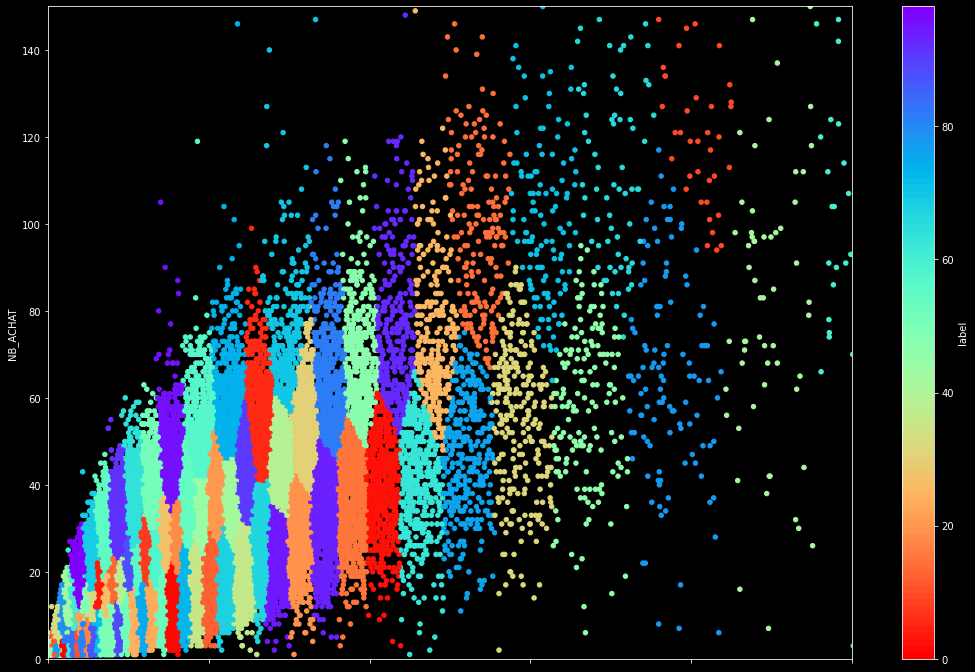

In [11]:
color_map = plt.get_cmap('rainbow', nb_cluster)
reversed_color_map = color_map.reversed()

ax = cart_df.plot.scatter(x="PRIX_NET", y="NB_ACHAT", c="label", colormap=reversed_color_map, figsize=(18,12))

ax.set_xlim([0, 1000])
ax.set_ylim([0, 150])